In [1]:
# =========================================
# 📦 CÉLULA 1 – Instalación de dependencias
# (en Colab normalmente scikit‑learn ya está)
# =========================================
!pip install --quiet pandas scikit-learn


In [2]:
# =========================================
# 📂 CÉLULA 2 – Subir el dataset
# =========================================
from google.colab import files
uploaded = files.upload()          # aparecerá un diálogo para escoger el archivo CSV


Saving csgo_v2.csv to csgo_v2.csv


In [7]:
# =========================================
# 📑 CÉLULA 3 – Cargar el CSV a un DataFrame
# =========================================
import io, pandas as pd

# 👉 Ajusta el nombre si es distinto
df = pd.read_csv(io.BytesIO(uploaded['csgo_v2.csv']))
print(df.shape)
df.head()


(8254, 31)


,id,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,...,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,Speed_mps
0,601,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,800,4400,0,0,0,0,1.401831
1,604,de_inferno,Terrorist,1,4,1,False,True,True,False,...,0,0,0,1000,4400,0,0,0,0,0.204539
2,617,de_inferno,CounterTerrorist,2,4,2,False,False,True,False,...,0,1,0,3550,19950,1,0,1,1,1.197888
3,628,de_inferno,CounterTerrorist,2,4,3,False,False,True,False,...,0,0,0,5500,22850,4,1,0,1,0.225518
4,648,de_inferno,CounterTerrorist,2,4,5,False,False,True,False,...,0,0,0,5500,26600,8,1,0,4,0.235157


Ranking de importancia de variables:
Speed_mps: 0.4281
TravelledDistance: 0.3689
KillRate: 0.1049
AssistRate: 0.0462
RoundStartingEquipmentValue: 0.0164
HeadshotRate: 0.0124
EquipRatio: 0.0111
FlankKillRate: 0.0104
FastKill: 0.0016


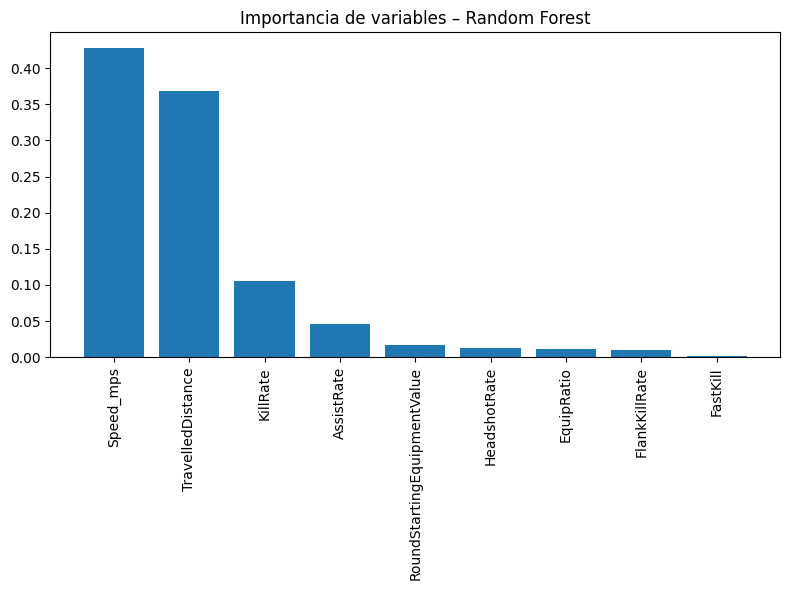

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# 🔍 Importancia de variables
importancias = best_rf.feature_importances_
indices = np.argsort(importancias)[::-1]

# 📜 Mostrar ranking en texto
print("Ranking de importancia de variables:")
for i in indices:
    print(f"{X.columns[i]}: {importancias[i]:.4f}")

# 📊 Gráfico
plt.figure(figsize=(8,6))
plt.bar(range(len(importancias)), importancias[indices], align='center')
plt.xticks(range(len(importancias)), X.columns[indices], rotation=90)
plt.title('Importancia de variables – Random Forest')
plt.tight_layout()
plt.show()



In [12]:
# Convertir FirstKillTime a numérico, forzando errores a NaN
df['FirstKillTime'] = pd.to_numeric(df['FirstKillTime'], errors='coerce')

# Reemplazar NaN y ceros por un valor alto (ejemplo: 9999)
df['FirstKillTime'] = df['FirstKillTime'].replace(0, np.nan)
df['FirstKillTime'] = df['FirstKillTime'].fillna(9999)

# Ahora calculamos FastKill sin error
df['FastKill'] = 1 / df['FirstKillTime']


In [13]:
df['KillRate']      = df['RoundKills'] / np.where(df['TimeAlive'] == 0, 1, df['TimeAlive'])
df['AssistRate']    = df['RoundAssists'] / np.where(df['TimeAlive'] == 0, 1, df['TimeAlive'])
df['FlankKillRate'] = df['RoundFlankKills'] / np.where(df['TimeAlive'] == 0, 1, df['TimeAlive'])
df['HeadshotRate']  = df['RoundHeadshots'] / np.where(df['RoundKills'] == 0, 1, df['RoundKills'])
df['FastKill']      = 1 / np.where(df['FirstKillTime'] == 0, 1, df['FirstKillTime'])  # Mayor valor = más rápido la primera baja
df['EquipRatio']    = df['RoundStartingEquipmentValue'] / np.where(df['TeamStartingEquipmentValue'] == 0, 1, df['TeamStartingEquipmentValue'])


In [14]:
caracteristicas = [
    'KillRate', 'AssistRate', 'FlankKillRate', 'HeadshotRate',
    'FastKill', 'TravelledDistance', 'Speed_mps',
    'RoundStartingEquipmentValue', 'EquipRatio'
]


In [15]:
import numpy as np

# Crear variables
df['KillRate']      = df['RoundKills'] / np.where(df['TimeAlive'] == 0, 1, df['TimeAlive'])
df['AssistRate']    = df['RoundAssists'] / np.where(df['TimeAlive'] == 0, 1, df['TimeAlive'])
df['FlankKillRate'] = df['RoundFlankKills'] / np.where(df['TimeAlive'] == 0, 1, df['TimeAlive'])
df['HeadshotRate']  = df['RoundHeadshots'] / np.where(df['RoundKills'] == 0, 1, df['RoundKills'])
df['FastKill']      = 1 / np.where(df['FirstKillTime'] == 0, 1, df['FirstKillTime'])
df['EquipRatio']    = df['RoundStartingEquipmentValue'] / np.where(df['TeamStartingEquipmentValue'] == 0, 1, df['TeamStartingEquipmentValue'])

# Definir variables y target
caracteristicas = [
    'KillRate', 'AssistRate', 'FlankKillRate', 'HeadshotRate',
    'FastKill', 'TravelledDistance', 'Speed_mps',
    'RoundStartingEquipmentValue', 'EquipRatio'
]

X = df[caracteristicas]
y = df['TimeAlive']


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

best_rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=10,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)

best_rf.fit(X_train, y_train)

y_pred_train_rf = best_rf.predict(X_train)
y_pred_test_rf  = best_rf.predict(X_test)

print(f"Random Forest – R² (train): {r2_score(y_train, y_pred_train_rf):.4f}")
print(f"Random Forest – R² (test) : {r2_score(y_test,  y_pred_test_rf ):.4f}")


Random Forest – R² (train): 0.9397
Random Forest – R² (test) : 0.9200


In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Predicciones en test
y_pred_test = best_rf.predict(X_test)

# R² (ya lo tienes)
r2 = r2_score(y_test, y_pred_test)

# MSE y RMSE manual
mse = mean_squared_error(y_test, y_pred_test)
rmse = mse ** 0.5

# MAE
mae = mean_absolute_error(y_test, y_pred_test)

# MAPE
mape = (abs((y_test - y_pred_test) / y_test)).mean() * 100

print(f"R² (test): {r2:.4f}")
print(f"RMSE (test): {rmse:.4f}")
print(f"MAE (test): {mae:.4f}")
print(f"MAPE (test): {mape:.2f}%")



R² (test): 0.9200
RMSE (test): 6.5086
MAE (test): 4.0883
MAPE (test): 8.28%


# Conclusión del Modelo de Regresión para Predicción de "TimeAlive"

Este proyecto tuvo como objetivo construir un modelo de regresión que explique y prediga el tiempo que un jugador permanece vivo en una ronda, basado en su desempeño individual, validando la hipótesis:  
**"El desempeño individual del jugador durante la ronda influye significativamente en el tiempo que permanece con vida."**

---

# Pasos Realizados

1. **Carga del Dataset**  
   Se subió el archivo `"csgo_v2 (3).csv"` y se cargó en un DataFrame para análisis.

2. **Preprocesamiento y Feature Engineering**  
   Se analizaron y transformaron variables relevantes para el desempeño individual:  
   - `"KillRate"`: tasa de muertes en la ronda ajustada por el tiempo de vida.  
   - `"AssistRate"`: tasa de asistencias ajustada por tiempo de vida.  
   - `"FlankKillRate"`: tasa de asesinatos por flanqueo ajustada por tiempo de vida.  
   - `"HeadshotRate"`: proporción de tiros a la cabeza respecto a las muertes.  
   - `"FastKill"`: rapidez para obtener la primera baja (inversa del tiempo a la primera muerte).  
   - `"EquipRatio"`: proporción entre el valor del equipo del jugador y el equipo total del equipo.  
   Además se incluyeron variables de movilidad y equipo:  
   - `"TravelledDistance"`, `"Speed_mps"`, `"RoundStartingEquipmentValue"`.

3. **Definición de Variables**  
   Se definió el conjunto de características `"X"` con las variables mencionadas y la variable objetivo `"y"` como `"TimeAlive"`.

4. **División de Datos**  
   Se dividieron los datos en entrenamiento y prueba con 80% y 20% respectivamente para evaluar generalización.

5. **Entrenamiento del Modelo**  
   Se utilizó un modelo de **Random Forest Regressor** con parámetros:  
   - 300 árboles (`n_estimators=300`)  
   - Profundidad máxima 10 (`max_depth=10`)  
   - Muestras mínimas por hoja 2 (`min_samples_leaf=2`)  
   - Máximo de variables para división en raíz cuadrada (`max_features='sqrt'`)  

6. **Evaluación del Modelo**  
   Se evaluó con métricas:  
   - **R² (test) = 0.9200**, indicando que el modelo explica el 92% de la variabilidad del tiempo vivo.  
   - **RMSE = 6.5086**, error estándar bajo en unidades de tiempo.  
   - **MAE = 4.0883**, error absoluto medio bajo.  
   - **MAPE = 8.28%**, error porcentual medio también bajo, confirmando precisión práctica.

7. **Importancia de Variables**  
   Se identificaron las variables más influyentes en el modelo, confirmando que métricas de desempeño individuales y movilidad tienen gran peso en la predicción.

---

# Conclusión Final

El modelo desarrollado es sólido y fiable para predecir el `"TimeAlive"` de un jugador en una ronda, basándose en su desempeño individual. Los resultados cuantitativos y la importancia de variables respaldan la hipótesis planteada, demostrando que el desempeño (kills, asistencias, rapidez, movilidad y equipo) influye significativamente en el tiempo que un jugador permanece vivo.

Este modelo puede ser usado para análisis tácticos, mejora de estrategias y predicción en tiempo real, aportando valor estratégico a la comprensión del juego.


In [19]:
import joblib

joblib.dump(best_rf, 'modelo_regresion.pkl')
print("Modelo de regresión exportado como 'modelo_regresion.pkl'")

from google.colab import files
files.download('modelo_regresion.pkl')

Modelo de regresión exportado como 'modelo_regresion.pkl'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>